In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = 'Actual_generation_202001010000_202401012359_Quarterhour.xlsx'
df = pd.read_excel(file_path, header=None, skiprows=9)

df.head()

/home/marshal/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
1,"Jan 1, 2020",12:00 AM,12:15 AM,1229.5,343.5,125.25,1476.25,0,56.25,2024,2320,496.25,1269.25,266.25,437.75
2,"Jan 1, 2020",12:15 AM,12:30 AM,1228.25,339.75,125.25,1471.5,0,55.5,2020.75,2326,487,1237.5,128,437.75
3,"Jan 1, 2020",12:30 AM,12:45 AM,1224.75,338.5,135,1527.5,0,55.5,2020.5,2334,485.5,1214.25,103,438.75
4,"Jan 1, 2020",12:45 AM,1:00 AM,1224.25,337.5,163.75,1559.5,0,55.5,2019.5,2337,493,1195.5,57.5,437.5


### Renaiming the columns of DataFrame 'df based on the values in the first row of the DataFrame

In [3]:
df2 = df.rename(columns=df.iloc[0])
df2.head()

,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
1,"Jan 1, 2020",12:00 AM,12:15 AM,1229.5,343.5,125.25,1476.25,0,56.25,2024,2320,496.25,1269.25,266.25,437.75
2,"Jan 1, 2020",12:15 AM,12:30 AM,1228.25,339.75,125.25,1471.5,0,55.5,2020.75,2326,487,1237.5,128,437.75
3,"Jan 1, 2020",12:30 AM,12:45 AM,1224.75,338.5,135,1527.5,0,55.5,2020.5,2334,485.5,1214.25,103,438.75
4,"Jan 1, 2020",12:45 AM,1:00 AM,1224.25,337.5,163.75,1559.5,0,55.5,2019.5,2337,493,1195.5,57.5,437.5


In [4]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140353 entries, 0 to 140352
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Date                        140353 non-null  object
 1   Start                       140353 non-null  object
 2   End                         140353 non-null  object
 3   Biomass [MWh]               140353 non-null  object
 4   Hydropower [MWh]            140353 non-null  object
 5   Wind offshore [MWh]         140353 non-null  object
 6   Wind onshore [MWh]          140353 non-null  object
 7   Photovoltaics [MWh]         140353 non-null  object
 8   Other renewable [MWh]       140353 non-null  object
 9   Nuclear [MWh]               140353 non-null  object
 10  Lignite [MWh]               140353 non-null  object
 11  Hard coal [MWh]             140353 non-null  object
 12  Fossil gas [MWh]            140353 non-null  object
 13  Hydro pumped storage [MWh]  1

(140353, 15)

In [5]:
# Assuming 'Date', 'Start', 'End', 'Wind offshore [MWh]', 'Wind onshore [MWh]' are present in df
Filtered_df = df2[['Date', 'Start', 'End', 'Wind offshore [MWh]', 'Wind onshore [MWh]']]

# Display the new DataFrame
Filtered_df.head()


,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
0,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
1,"Jan 1, 2020",12:00 AM,12:15 AM,125.25,1476.25
2,"Jan 1, 2020",12:15 AM,12:30 AM,125.25,1471.5
3,"Jan 1, 2020",12:30 AM,12:45 AM,135,1527.5
4,"Jan 1, 2020",12:45 AM,1:00 AM,163.75,1559.5


Drop Other columns and remain with Wind Energy Only

### Drop first row as it is a duplicate of our column name

In [6]:
filtered_review=Filtered_df.drop(Filtered_df.index[0])
filtered_review.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
1,"Jan 1, 2020",12:00 AM,12:15 AM,125.25,1476.25
2,"Jan 1, 2020",12:15 AM,12:30 AM,125.25,1471.5
3,"Jan 1, 2020",12:30 AM,12:45 AM,135,1527.5
4,"Jan 1, 2020",12:45 AM,1:00 AM,163.75,1559.5
5,"Jan 1, 2020",1:00 AM,1:15 AM,222.5,1521


In [7]:
# Count null values in each column
null_counts = filtered_review.isnull().sum()

# Display the count of null values for each column
print(null_counts)

Date                   0
Start                  0
End                    0
Wind offshore [MWh]    0
Wind onshore [MWh]     0
dtype: int64


In [8]:
filtered_review.info()
filtered_review.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140352 entries, 1 to 140352
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Date                 140352 non-null  object
 1   Start                140352 non-null  object
 2   End                  140352 non-null  object
 3   Wind offshore [MWh]  140352 non-null  object
 4   Wind onshore [MWh]   140352 non-null  object
dtypes: object(5)
memory usage: 5.4+ MB


(140352, 5)

In [9]:
print(filtered_review.columns)
# check out columns name and number

Index(['Date', 'Start', 'End', 'Wind offshore [MWh]', 'Wind onshore [MWh]'], dtype='object')


### convert  'Date' to datetime format

In [10]:
filtered_review['Date'] = pd.to_datetime(filtered_review['Date'], format='%b %d, %Y')

In [11]:
filtered_review.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
1,2020-01-01,12:00 AM,12:15 AM,125.25,1476.25
2,2020-01-01,12:15 AM,12:30 AM,125.25,1471.5
3,2020-01-01,12:30 AM,12:45 AM,135,1527.5
4,2020-01-01,12:45 AM,1:00 AM,163.75,1559.5
5,2020-01-01,1:00 AM,1:15 AM,222.5,1521


drop down start and end time and resample daily


In [12]:
print(filtered_review.columns)

Index(['Date', 'Start', 'End', 'Wind offshore [MWh]', 'Wind onshore [MWh]'], dtype='object')


In [13]:
df3= filtered_review[['Date','Wind offshore [MWh]','Wind onshore [MWh]']]

In [14]:
df3.head()

,Date,Wind offshore [MWh],Wind onshore [MWh]
1,2020-01-01,125.25,1476.25
2,2020-01-01,125.25,1471.5
3,2020-01-01,135,1527.5
4,2020-01-01,163.75,1559.5
5,2020-01-01,222.5,1521


In [15]:
df3.set_index('Date', inplace=True)

In [16]:
df3.head()

,Wind offshore [MWh],Wind onshore [MWh]
Date,,
2020-01-01,125.25,1476.25
2020-01-01,125.25,1471.5
2020-01-01,135,1527.5
2020-01-01,163.75,1559.5
2020-01-01,222.5,1521


In [17]:
print(df3.columns)


Index(['Wind offshore [MWh]', 'Wind onshore [MWh]'], dtype='object')


In [18]:
df3.info()
df3.shape


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140352 entries, 2020-01-01 to 2024-01-01
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Wind offshore [MWh]  140352 non-null  object
 1   Wind onshore [MWh]   140352 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


(140352, 2)

###  convert the values in a Series to numeric format.

In [19]:
df3['Wind offshore [MWh]'] = pd.to_numeric(df3['Wind offshore [MWh]'], errors='coerce')
df3['Wind onshore [MWh]'] = pd.to_numeric(df3['Wind onshore [MWh]'], errors='coerce')

/tmp/ipykernel_5366/3439912741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Wind offshore [MWh]'] = pd.to_numeric(df3['Wind offshore [MWh]'], errors='coerce')
/tmp/ipykernel_5366/3439912741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Wind onshore [MWh]'] = pd.to_numeric(df3['Wind onshore [MWh]'], errors='coerce')


In [20]:
df3.info()
df3.shape



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140352 entries, 2020-01-01 to 2024-01-01
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Wind offshore [MWh]  140352 non-null  float64
 1   Wind onshore [MWh]   140352 non-null  float64
dtypes: float64(2)
memory usage: 3.2 MB


(140352, 2)

In [21]:
df3.head()

,Wind offshore [MWh],Wind onshore [MWh]
Date,,
2020-01-01,125.25,1476.25
2020-01-01,125.25,1471.50
2020-01-01,135.00,1527.50
2020-01-01,163.75,1559.50
2020-01-01,222.50,1521.00


### Resampling Our DataSet (Daily)

In [22]:
df_resampled = df3.resample('M').sum()


df_resampled, is a new DataFrame where the time series data from df7 has been resampled at a daily frequency, and the values for each day are the sums of the original data for that day.

In [23]:
df_resampled.head()

,Wind offshore [MWh],Wind onshore [MWh]
Date,,
2020-01-31,3280590.50,12667133.50
2020-02-29,2995582.25,17241182.25
2020-03-31,2627413.50,11538062.25
2020-04-30,1832053.00,6957597.00
2020-05-31,1567378.25,6094043.50


### Plot Time series Graph

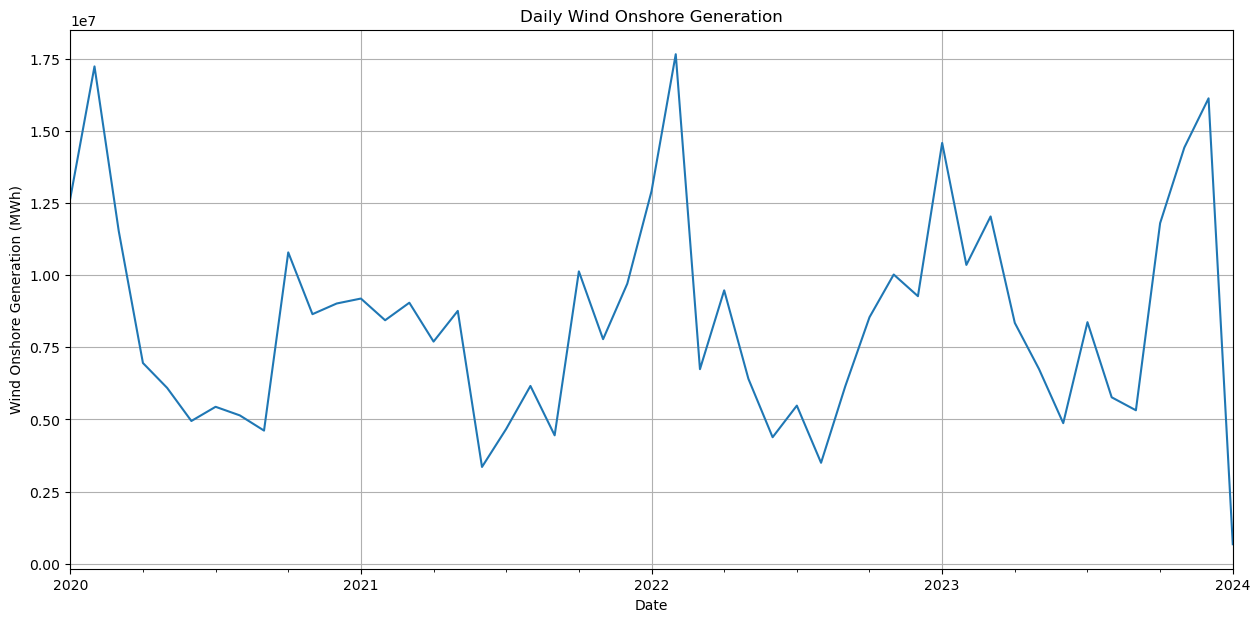

In [24]:
plt.figure(figsize=(15, 7))
df_resampled['Wind onshore [MWh]'].plot()
plt.title('Daily Wind Onshore Generation')
plt.xlabel('Date')
plt.ylabel('Wind Onshore Generation (MWh)')
plt.grid(True)
plt.show()

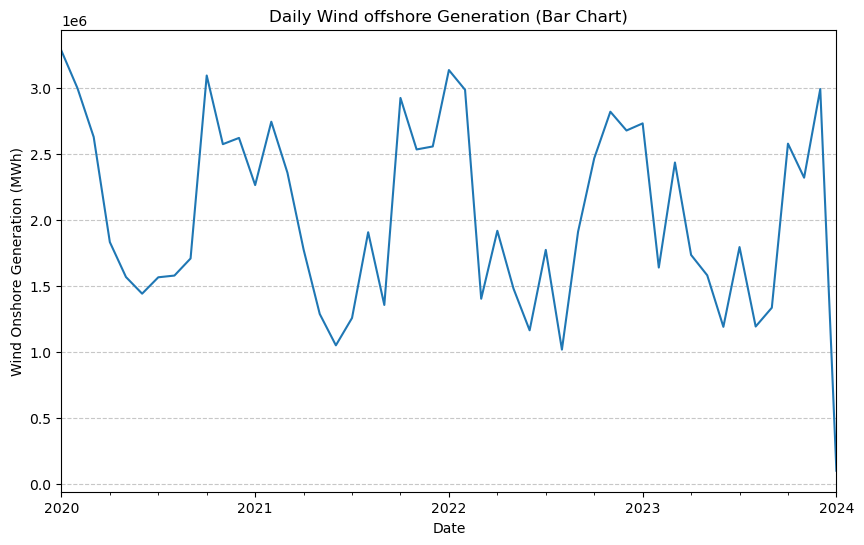

In [25]:
plt.figure(figsize=(10, 6))
df_resampled['Wind offshore [MWh]'].plot()
plt.title('Daily Wind offshore Generation (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Wind Onshore Generation (MWh)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
g_stats = df_resampled[['Wind onshore [MWh]', 'Wind offshore [MWh]']].describe()
print(g_stats)

       Wind onshore [MWh]  Wind offshore [MWh]
count        4.900000e+01         4.900000e+01
mean         8.419167e+06         2.025766e+06
std          3.702012e+06         7.126287e+05
min          6.742468e+05         1.012748e+05
25%          5.480207e+06         1.480282e+06
50%          8.373148e+06         1.906612e+06
75%          1.013439e+07         2.620454e+06
max          1.766380e+07         3.280590e+06


In [27]:

max_value = df_resampled['Wind onshore [MWh]'].max()
max_value_index = df_resampled['Wind onshore [MWh]'].idxmax()
min_value = df_resampled['Wind onshore [MWh]'].min()
min_value_index = df_resampled['Wind onshore [MWh]'].idxmin()
average_value = df_resampled['Wind onshore [MWh]'].mean()

print(f"Maximum Wind Onshore Generation: {max_value} MWh (Index:{max_value_index} )")
print(f"Minimum Wind Onshore Generation: {min_value} MWh (Index:{min_value_index})")
print(f"Average Wind Onshore Generation: {average_value} MWh")

Maximum Wind Onshore Generation: 17663797.25 MWh (Index:2022-02-28 00:00:00 )
Minimum Wind Onshore Generation: 674246.75 MWh (Index:2024-01-31 00:00:00)
Average Wind Onshore Generation: 8419167.107142856 MWh


# Relationship Plot of Wind Generation Over Time

/home/marshal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


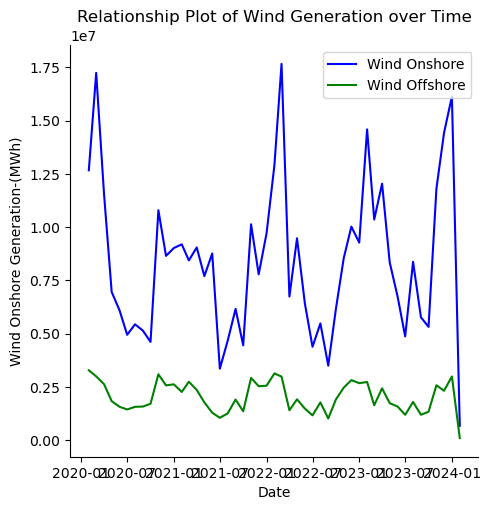

In [28]:
sns.relplot(x='Date', y='Wind onshore [MWh]',data=df_resampled,kind='line', label='Wind Onshore', color ='blue')
sns.lineplot(x=df_resampled.index, y='Wind offshore [MWh]', data=df_resampled, label='Wind Offshore', color ='green')

plt.title('Relationship Plot of Wind Generation over Time')
plt.xlabel('Date')
plt.ylabel('Wind Onshore Generation-(MWh)')
plt.show()

## Correlation heatmap to understand relationships between Wind Onshore and Off energy types

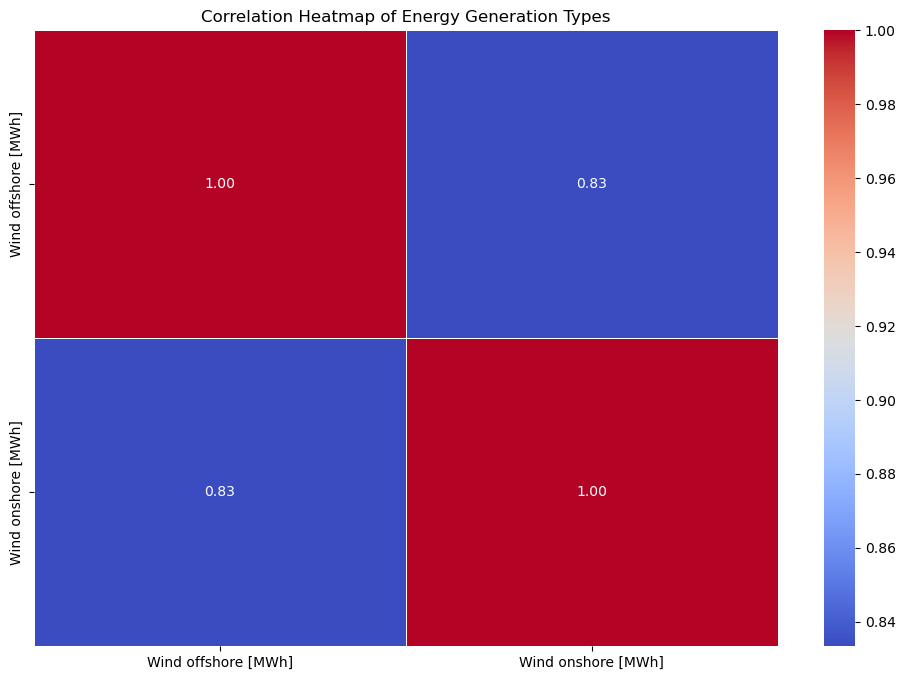

In [29]:
# Calculating the correlation matrix
corr_matrix = df_resampled.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Energy Generation Types')
plt.show()

in this case We observe a strong positive correlation between Wind onshore and Wind offshore energy generation.

## Observation of Wind Onshore For 1 Year (2023)

In [31]:
filtered_review.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
1,2020-01-01,12:00 AM,12:15 AM,125.25,1476.25
2,2020-01-01,12:15 AM,12:30 AM,125.25,1471.5
3,2020-01-01,12:30 AM,12:45 AM,135,1527.5
4,2020-01-01,12:45 AM,1:00 AM,163.75,1559.5
5,2020-01-01,1:00 AM,1:15 AM,222.5,1521


In [37]:
print(filtered_review.columns)


Index(['Date', 'Start', 'End', 'Wind offshore [MWh]', 'Wind onshore [MWh]'], dtype='object')


In [39]:
data_2023 = filtered_review[filtered_review['Date'].dt.year == 2023]

In [40]:
data_2023.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
105217,2023-01-01,12:00 AM,12:15 AM,684.25,7145.75
105218,2023-01-01,12:15 AM,12:30 AM,743.5,7158.25
105219,2023-01-01,12:30 AM,12:45 AM,817,7302.25
105220,2023-01-01,12:45 AM,1:00 AM,814.5,7104.25
105221,2023-01-01,1:00 AM,1:15 AM,785.5,7322


In [41]:
# Converting the  'Start', and 'End' columns to datetime objects

data_2023['Start'] = pd.to_datetime(data_2023['Start'], format='%I:%M %p').dt.time
data_2023['End'] = pd.to_datetime(data_2023['End'], format='%I:%M %p').dt.time


/tmp/ipykernel_5366/3157476938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Start'] = pd.to_datetime(data_2023['Start'], format='%I:%M %p').dt.time
/tmp/ipykernel_5366/3157476938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['End'] = pd.to_datetime(data_2023['End'], format='%I:%M %p').dt.time


In [42]:
data_2023.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh]
105217,2023-01-01,00:00:00,00:15:00,684.25,7145.75
105218,2023-01-01,00:15:00,00:30:00,743.5,7158.25
105219,2023-01-01,00:30:00,00:45:00,817,7302.25
105220,2023-01-01,00:45:00,01:00:00,814.5,7104.25
105221,2023-01-01,01:00:00,01:15:00,785.5,7322


In [45]:
# Extracting the day of week and hour from the 'Start' column
data_2023['DayOfWeek'] = data_2023['Date'].dt.day_name()
data_2023['Hour'] = data_2023['Start'].apply(lambda x: x.hour)
data_2023['Month'] = data_2023['Date'].dt.month_name()

/tmp/ipykernel_5366/3594587618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['DayOfWeek'] = data_2023['Date'].dt.day_name()
/tmp/ipykernel_5366/3594587618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Hour'] = data_2023['Start'].apply(lambda x: x.hour)
/tmp/ipykernel_5366/3594587618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [46]:
data_2023.head()

,Date,Start,End,Wind offshore [MWh],Wind onshore [MWh],DayOfWeek,Hour,Month
105217,2023-01-01,00:00:00,00:15:00,684.25,7145.75,Sunday,0,January
105218,2023-01-01,00:15:00,00:30:00,743.5,7158.25,Sunday,0,January
105219,2023-01-01,00:30:00,00:45:00,817,7302.25,Sunday,0,January
105220,2023-01-01,00:45:00,01:00:00,814.5,7104.25,Sunday,0,January
105221,2023-01-01,01:00:00,01:15:00,785.5,7322,Sunday,1,January
